<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [35]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [36]:
df.loc[df.CCC % 2 == 0, "BBB"] = 12.5

In [37]:
df

,AAA,BBB,CCC
0,4,12.5,100
1,5,12.5,50
2,6,12.5,-30
3,7,12.5,-50


In [38]:
df.loc[df.CCC % 2 == 0, ["BBB", "AAA"]] = 105

In [39]:
df

,AAA,BBB,CCC
0,105,105.0,100
1,105,105.0,50
2,105,105.0,-30
3,105,105.0,-50


In [40]:
df.loc[df.CCC > 30, ["BBB", "AAA"]] = 12.5

In [41]:
df

,AAA,BBB,CCC
0,12.5,12.5,100
1,12.5,12.5,50
2,105.0,105.0,-30
3,105.0,105.0,-50


In [42]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

In [43]:
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,12.5,-1000.0,100
1,12.5,-1000.0,-1000
2,105.0,-1000.0,-30
3,105.0,-1000.0,-1000


In [44]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [45]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [46]:
df["logic"] = np.where(df["AAA"] == 5, "high", "low")

In [47]:
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,high
2,6,30,-30,low
3,7,40,-50,low


In [48]:
df[df.AAA <= 5]

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,high


In [49]:
df[df.AAA > 5]

,AAA,BBB,CCC,logic
2,6,30,-30,low
3,7,40,-50,low


In [50]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [51]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [52]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

In [53]:
df

,AAA,BBB,CCC,logic
0,999,10,100,low
1,5,20,50,high
2,999,30,-30,low
3,999,40,-50,low


In [54]:
aValue = 43.0

In [55]:
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC,logic
1,5,20,50,high
0,999,10,100,low
2,999,30,-30,low
3,999,40,-50,low


In [56]:
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 20.0
Crit3 = df.CCC > -40.0
AllCrit = Crit1 & Crit2 & Crit3

In [57]:
df[AllCrit]

,AAA,BBB,CCC,logic
1,5,20,50,high


In [58]:
import functools

CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

df[AllCrit]

,AAA,BBB,CCC,logic
1,5,20,50,high


In [59]:
df[(df.AAA >= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC,logic
0,999,10,100,low
2,999,30,-30,low


In [60]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"]
)

In [61]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [62]:
df.loc["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [63]:
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [64]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [65]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [66]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [67]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [68]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [69]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


In [70]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

In [71]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [72]:
source_cols = df.columns

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

df[new_cols] = df[source_cols].applymap(categories.get)

In [73]:
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [74]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [75]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [76]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


In [77]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

In [78]:
df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [79]:
df = df.set_index("row")

In [80]:
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [81]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

In [82]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [83]:
df = df.stack(0).reset_index(1)

In [84]:
df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [85]:
df.columns = ["Sample", "All_X", "All_Y"]

In [86]:
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [87]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

In [88]:
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)


In [89]:
df

A                   B                   C          
          O         I         O         I         O         I
n -0.616935  0.645967  1.581489  0.064923  0.175397  0.445373
m  2.276310  2.151115 -0.181039 -1.641227  0.521153 -0.329834

In [90]:
df = df.div(df["C"], level=1)

In [91]:
df

A                   B              C     
          O         I         O         I    O    I
n -3.517354  1.450396  9.016610  0.145772  1.0  1.0
m  4.367836 -6.521813 -0.347381  4.975918  1.0  1.0

In [92]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [93]:
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [94]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [95]:
import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [96]:
All = slice(None)

In [97]:
df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [98]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [99]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [100]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [101]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


In [102]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [103]:
df = pd.DataFrame({'A' : ['a1', 'a1', 'a2', 'a3'], 
                   'B' : ['b1', 'b2', 'b3', 'b4'], 
                   'Vals' : np.random.randn(4)}
                 ).groupby(['A', 'B']).sum()

pd.concat([df], keys=['Foo'], names=['Firstlevel'])

Vals
Firstlevel A  B           
Foo        a1 b1 -0.572129
              b2 -0.077981
           a2 b3  0.737497
           a3 b4  0.628580

In [104]:
df.columns = df.columns.get_level_values(0)

df

Vals
A  B           
a1 b1 -0.572129
   b2 -0.077981
a2 b3  0.737497
a3 b4  0.628580

In [105]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A")
)

df

,A
2013-08-01,2.408993
2013-08-02,-2.667246
2013-08-05,-1.588527
2013-08-06,-0.882136
2013-08-07,0.108299
2013-08-08,1.075387


In [106]:
df.loc[df.index[3], "A"] = np.nan

df

,A
2013-08-01,2.408993
2013-08-02,-2.667246
2013-08-05,-1.588527
2013-08-06,NaN
2013-08-07,0.108299
2013-08-08,1.075387


In [107]:
df.bfill()

,A
2013-08-01,2.408993
2013-08-02,-2.667246
2013-08-05,-1.588527
2013-08-06,0.108299
2013-08-07,0.108299
2013-08-08,1.075387


In [108]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [109]:
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [110]:
gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [111]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

In [112]:
expected_df = gb.apply(GrowUp)

expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [113]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):
    return x * (1 + y)

def red(x):
    return functools.reduce(cum_ret, x, 1.0)


In [114]:
S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [115]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

gb = df.groupby("A")

def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())

gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [116]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

code_groups = df.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")

sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [117]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT

mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

ts.resample("5min").apply(mhc)

ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [118]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [119]:
df["Counts"] = df.groupby(["Color"]).transform(len)

df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [120]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [121]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [122]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])

mask = df.groupby(level=0).agg("idxmax")

df_count = df.loc[mask["no"]].reset_index()

df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [123]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [124]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

dfs[0]

,Case,Data
0,A,-1.117365
1,A,-0.855320
2,A,0.874743
3,B,-1.431051


In [125]:
dfs[1]

,Case,Data
4,A,-0.335180
5,A,-0.973434
6,B,0.809263


In [126]:
dfs[2]

,Case,Data
7,A,-0.102130
8,A,0.369455


In [127]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

table.stack("City")

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [128]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)


In [129]:
df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [130]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="M", periods=36)
)

pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)


,2011,2012,2013
1,0.253689,2.122560,-0.898770
2,-0.262275,1.197899,-0.702366
3,0.149681,-0.135141,0.285519
4,0.877800,0.211422,0.060169
5,-0.517326,-0.039902,0.148504
6,1.738326,0.050784,2.572206
7,-0.219036,0.263106,1.006702
8,-0.098367,0.073604,0.849709
9,-0.432383,-1.435859,0.972734
10,1.330292,0.954085,0.664223


In [131]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

def SeriesFromSubList(aList):
    return pd.Series(aList)

df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

df_orgz


0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [132]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)


df

,A,B
2001-01-01,-0.000044,-0.000067
2001-01-02,0.000096,-0.000084
2001-01-03,0.000017,0.000020
2001-01-04,-0.000131,0.000027
2001-01-05,0.000086,0.000076
...,...,...
2006-06-19,-0.000119,0.000011
2006-06-20,0.000034,-0.000085
2006-06-21,0.000082,0.000122
2006-06-22,0.000013,-0.000023


In [133]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]


s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)


s

2001-01-01    0.000115
2001-01-02    0.000921
2001-01-03    0.000315
2001-01-04   -0.000078
2001-01-05   -0.001768
                ...   
2006-04-30   -0.007155
2006-05-01   -0.006451
2006-05-02   -0.005552
2006-05-03   -0.004186
2006-05-04   -0.003387
Length: 1950, dtype: float64

In [134]:
rng = pd.date_range(start="2014-01-01", periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)


df

,Open,Close,Volume
2014-01-01,1.205602,-0.731573,1002
2014-01-02,-0.230275,-1.528097,953
2014-01-03,2.005596,0.129774,1248
2014-01-04,-0.811528,0.723267,882
2014-01-05,0.110417,0.590208,1543
...,...,...,...
2014-04-06,-1.286690,-0.058276,1467
2014-04-07,0.502621,0.835134,1366
2014-04-08,-0.793702,-1.599982,1359
2014-04-09,-0.083493,-0.874640,1751


In [135]:
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()


window = 5

s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)


s.round(2)

2014-01-06   -0.09
2014-01-07   -0.03
2014-01-08    0.36
2014-01-09    0.47
2014-01-10   -0.01
              ... 
2014-04-06    0.22
2014-04-07   -0.02
2014-04-08    0.34
2014-04-09   -0.21
2014-04-10   -0.49
Length: 95, dtype: float64

In [136]:
dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [137]:
rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

df = pd.concat([df1, df2], ignore_index=True)

df

,A,B,C
0,-0.047984,-0.457464,0.420972
1,-0.411575,-1.049871,1.669963
2,-1.502563,-0.850137,-1.294662
3,-0.601242,0.740008,-1.044772
4,2.237373,-0.502229,-0.678661
5,1.160960,-0.096002,-2.029782
6,-0.047984,-0.457464,0.420972
7,-0.411575,-1.049871,1.669963
8,-1.502563,-0.850137,-1.294662
9,-0.601242,0.740008,-1.044772


In [138]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

df

,Area,Bins,Test_0,Data
0,A,110,0,-0.727694
1,A,110,1,-0.128221
2,A,160,0,-0.179755
3,A,160,1,0.222948
4,A,160,2,-0.873021
5,C,40,0,0.317286
6,C,40,1,0.653178


In [139]:
df["Test_1"] = df["Test_0"] - 1

pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,-0.727694,-1,1,-0.128221,0
1,A,160,0,-0.179755,-1,1,0.222948,0
2,A,160,1,0.222948,0,2,-0.873021,1
3,C,40,0,0.317286,-1,1,0.653178,0


<Axes: title={'center': 'price'}, xlabel='quartiles'>

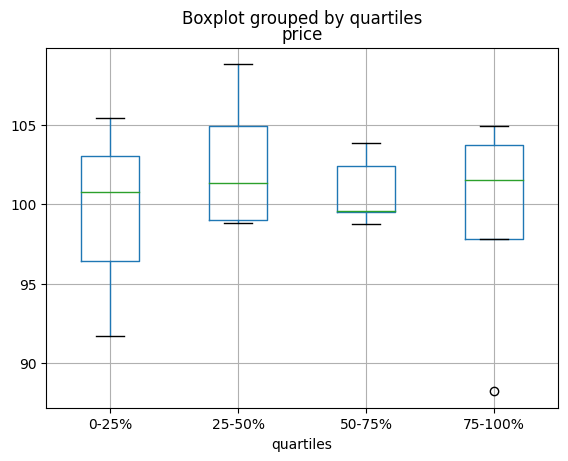

In [140]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)

df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)

df.boxplot(column="price", by="quartiles")

In [141]:
import glob
import os

for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))

files = ["file_0.csv", "file_1.csv", "file_2.csv"]
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)



In [142]:
files = glob.glob("file_*.csv")
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

result

,Unnamed: 0,0,1,2,3
0,0,0.406518,-1.001969,0.451032,0.977005
1,1,0.942773,-0.093662,-0.362443,1.052462
2,2,-1.213261,0.919513,0.233249,0.248597
3,3,-1.341275,-0.789675,-1.354203,-1.704830
4,4,1.165052,-1.458233,-0.780384,-0.943796
5,5,1.624334,0.314780,-0.227000,1.150871
6,6,0.466644,0.205272,0.452397,1.433238
7,7,-1.069617,-0.184100,-0.790796,-0.900675
8,8,-0.334488,2.377948,0.403439,-1.565430
9,9,-0.486449,-0.019026,-1.069670,0.158431


In [143]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [144]:
from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)


,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [145]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [146]:
df = pd.DataFrame(np.random.randn(8, 3))

store = pd.HDFStore("test.h5")
store.put("df", df)
store.get_storer("df").attrs.my_attribute = {"A": 10}
store.get_storer("df").attrs.my_attribute

{'A': 10}

In [147]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.120227,NaN,NaN,NaN,NaN
2,0.008522,-0.056600,NaN,NaN,NaN
3,0.161512,-0.000114,-0.020548,NaN,NaN
4,0.009742,0.075495,0.015802,-0.072922,NaN


In [148]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b

In [149]:
df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

,0,1,2
0,1.000000,0.223481,0.161752
1,0.223481,1.000000,0.134382
2,0.161752,0.134382,1.000000


In [150]:
import datetime

s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [151]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [152]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [153]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [154]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [155]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [156]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

df = pd.DataFrame({"A": s, "B": deltas})

df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [157]:
df["New Dates"] = df["A"] + df["B"]

df["Delta"] = df["A"] - df["New Dates"]

df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [158]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [159]:
y = s - s.shift()

y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [160]:
y[1] = np.nan

y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

In [161]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)

df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


In [163]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

is_constant

False

In [164]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

is_constant

False

In [165]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()

is_constant

False